In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

pd.set_option("display.max_columns", None)
sns.set(style="whitegrid")

train = pd.read_csv("train.csv")  
test = pd.read_csv("test.csv")
sample_submission = pd.read_csv("sample_submission.csv")

print("Files loaded successfully!")
print("Train Shape:", train.shape)
print("Test Shape:", test.shape)
print("Sample Submission Shape:", sample_submission.shape)

display(train.head())
display(test.head())
display(sample_submission.head())

print("\nTrain Info:")
print(train.info())
print("\nTest Info:")
print(test.info())

print("\nSummary Statistics (Train):")
display(train.describe(include="all"))

print("\nSummary Statistics (Test):")
display(test.describe(include="all"))

# 1.2 Missing Values
print("\nMissing Values (Train):")
print(train.isnull().sum())

print("\nMissing Values (Test):")
print(test.isnull().sum())




Files loaded successfully!
Train Shape: (1200000, 21)
Test Shape: (800000, 20)
Sample Submission Shape: (800000, 2)


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
0,0,19.0,Female,10049.0,Married,1.0,Bachelor's,Self-Employed,22.598761,Urban,Premium,2.0,17.0,372.0,5.0,2023-12-23 15:21:39.134960,Poor,No,Weekly,House,2869.0
1,1,39.0,Female,31678.0,Divorced,3.0,Master's,NaN,15.569731,Rural,Comprehensive,1.0,12.0,694.0,2.0,2023-06-12 15:21:39.111551,Average,Yes,Monthly,House,1483.0
2,2,23.0,Male,25602.0,Divorced,3.0,High School,Self-Employed,47.177549,Suburban,Premium,1.0,14.0,NaN,3.0,2023-09-30 15:21:39.221386,Good,Yes,Weekly,House,567.0
3,3,21.0,Male,141855.0,Married,2.0,Bachelor's,NaN,10.938144,Rural,Basic,1.0,0.0,367.0,1.0,2024-06-12 15:21:39.226954,Poor,Yes,Daily,Apartment,765.0
4,4,21.0,Male,39651.0,Single,1.0,Bachelor's,Self-Employed,20.376094,Rural,Premium,0.0,8.0,598.0,4.0,2021-12-01 15:21:39.252145,Poor,Yes,Weekly,House,2022.0


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
0,1200000,28.0,Female,2310.0,NaN,4.0,Bachelor's,Self-Employed,7.657981,Rural,Basic,NaN,19.0,NaN,1.0,2023-06-04 15:21:39.245086,Poor,Yes,Weekly,House
1,1200001,31.0,Female,126031.0,Married,2.0,Master's,Self-Employed,13.381379,Suburban,Premium,NaN,14.0,372.0,8.0,2024-04-22 15:21:39.224915,Good,Yes,Rarely,Apartment
2,1200002,47.0,Female,17092.0,Divorced,0.0,PhD,Unemployed,24.354527,Urban,Comprehensive,NaN,16.0,819.0,9.0,2023-04-05 15:21:39.134960,Average,Yes,Monthly,Condo
3,1200003,28.0,Female,30424.0,Divorced,3.0,PhD,Self-Employed,5.136225,Suburban,Comprehensive,1.0,3.0,770.0,5.0,2023-10-25 15:21:39.134960,Poor,Yes,Daily,House
4,1200004,24.0,Male,10863.0,Divorced,2.0,High School,Unemployed,11.844155,Suburban,Premium,NaN,14.0,755.0,7.0,2021-11-26 15:21:39.259788,Average,No,Weekly,House


,id,Premium Amount
0,1200000,1102.545
1,1200001,1102.545
2,1200002,1102.545
3,1200003,1102.545
4,1200004,1102.545



Train Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200000 entries, 0 to 1199999
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype  
---  ------                --------------    -----  
 0   id                    1200000 non-null  int64  
 1   Age                   1181295 non-null  float64
 2   Gender                1200000 non-null  object 
 3   Annual Income         1155051 non-null  float64
 4   Marital Status        1181471 non-null  object 
 5   Number of Dependents  1090328 non-null  float64
 6   Education Level       1200000 non-null  object 
 7   Occupation            841925 non-null   object 
 8   Health Score          1125924 non-null  float64
 9   Location              1200000 non-null  object 
 10  Policy Type           1200000 non-null  object 
 11  Previous Claims       835971 non-null   float64
 12  Vehicle Age           1199994 non-null  float64
 13  Credit Score          1062118 non-null  float64
 14  Insurance Duration   

,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type,Premium Amount
count,1.200000e+06,1.181295e+06,1200000,1.155051e+06,1181471,1.090328e+06,1200000,841925,1.125924e+06,1200000,1200000,835971.000000,1.199994e+06,1.062118e+06,1.199999e+06,1200000,1122176,1200000,1200000,1200000,1.200000e+06
unique,NaN,NaN,2,NaN,3,NaN,4,3,NaN,3,3,NaN,NaN,NaN,NaN,167381,3,2,4,3,NaN
top,NaN,NaN,Male,NaN,Single,NaN,Master's,Employed,NaN,Suburban,Premium,NaN,NaN,NaN,NaN,2020-02-08 15:21:39.134960,Average,Yes,Weekly,House,NaN
freq,NaN,NaN,602571,NaN,395391,NaN,303818,282750,NaN,401542,401846,NaN,NaN,NaN,NaN,142,377905,601873,306179,400349,NaN
mean,5.999995e+05,4.114556e+01,NaN,3.274522e+04,NaN,2.009934e+00,NaN,NaN,2.561391e+01,NaN,NaN,1.002689,9.569889e+00,5.929244e+02,5.018219e+00,NaN,NaN,NaN,NaN,NaN,1.102545e+03
std,3.464103e+05,1.353995e+01,NaN,3.217951e+04,NaN,1.417338e+00,NaN,NaN,1.220346e+01,NaN,NaN,0.982840,5.776189e+00,1.499819e+02,2.594331e+00,NaN,NaN,NaN,NaN,NaN,8.649989e+02
min,0.000000e+00,1.800000e+01,NaN,1.000000e+00,NaN,0.000000e+00,NaN,NaN,2.012237e+00,NaN,NaN,0.000000,0.000000e+00,3.000000e+02,1.000000e+00,NaN,NaN,NaN,NaN,NaN,2.000000e+01
25%,2.999998e+05,3.000000e+01,NaN,8.001000e+03,NaN,1.000000e+00,NaN,NaN,1.591896e+01,NaN,NaN,0.000000,5.000000e+00,4.680000e+02,3.000000e+00,NaN,NaN,NaN,NaN,NaN,5.140000e+02
50%,5.999995e+05,4.100000e+01,NaN,2.391100e+04,NaN,2.000000e+00,NaN,NaN,2.457865e+01,NaN,NaN,1.000000,1.000000e+01,5.950000e+02,5.000000e+00,NaN,NaN,NaN,NaN,NaN,8.720000e+02
75%,8.999992e+05,5.300000e+01,NaN,4.463400e+04,NaN,3.000000e+00,NaN,NaN,3.452721e+01,NaN,NaN,2.000000,1.500000e+01,7.210000e+02,7.000000e+00,NaN,NaN,NaN,NaN,NaN,1.509000e+03



Summary Statistics (Test):


,id,Age,Gender,Annual Income,Marital Status,Number of Dependents,Education Level,Occupation,Health Score,Location,Policy Type,Previous Claims,Vehicle Age,Credit Score,Insurance Duration,Policy Start Date,Customer Feedback,Smoking Status,Exercise Frequency,Property Type
count,8.000000e+05,787511.000000,800000,770140.000000,787664,726870.000000,800000,560875,750551.000000,800000,800000,557198.000000,799997.000000,708549.000000,799998.000000,800000,747724,800000,800000,800000
unique,NaN,NaN,2,NaN,3,NaN,4,3,NaN,3,3,NaN,NaN,NaN,NaN,158776,3,2,4,3
top,NaN,NaN,Male,NaN,Single,NaN,Master's,Employed,NaN,Suburban,Premium,NaN,NaN,NaN,NaN,2022-08-30 15:21:39.134960,Average,Yes,Weekly,House
freq,NaN,NaN,401089,NaN,263705,NaN,202552,188574,NaN,267190,267629,NaN,NaN,NaN,NaN,98,251217,401859,204514,267151
mean,1.600000e+06,41.136440,NaN,32803.871471,NaN,2.009337,NaN,NaN,25.613036,NaN,NaN,1.004873,9.571891,592.904749,5.018949,NaN,NaN,NaN,NaN,NaN
std,2.309403e+05,13.537829,NaN,32201.063749,NaN,1.415241,NaN,NaN,12.206882,NaN,NaN,0.982803,5.772200,150.116374,2.593759,NaN,NaN,NaN,NaN,NaN
min,1.200000e+06,18.000000,NaN,2.000000,NaN,0.000000,NaN,NaN,1.646561,NaN,NaN,0.000000,0.000000,300.000000,1.000000,NaN,NaN,NaN,NaN,NaN
25%,1.400000e+06,30.000000,NaN,8048.000000,NaN,1.000000,NaN,NaN,15.917353,NaN,NaN,0.000000,5.000000,468.000000,3.000000,NaN,NaN,NaN,NaN,NaN
50%,1.600000e+06,41.000000,NaN,23981.000000,NaN,2.000000,NaN,NaN,24.580164,NaN,NaN,1.000000,10.000000,595.000000,5.000000,NaN,NaN,NaN,NaN,NaN
75%,1.799999e+06,53.000000,NaN,44660.000000,NaN,3.000000,NaN,NaN,34.517766,NaN,NaN,2.000000,15.000000,721.000000,7.000000,NaN,NaN,NaN,NaN,NaN



Missing Values (Train):
id                           0
Age                      18705
Gender                       0
Annual Income            44949
Marital Status           18529
Number of Dependents    109672
Education Level              0
Occupation              358075
Health Score             74076
Location                     0
Policy Type                  0
Previous Claims         364029
Vehicle Age                  6
Credit Score            137882
Insurance Duration           1
Policy Start Date            0
Customer Feedback        77824
Smoking Status               0
Exercise Frequency           0
Property Type                0
Premium Amount               0
dtype: int64

Missing Values (Test):
id                           0
Age                      12489
Gender                       0
Annual Income            29860
Marital Status           12336
Number of Dependents     73130
Education Level              0
Occupation              239125
Health Score             49449
Location

In [10]:
num_features = train.select_dtypes(include=[np.number]).columns.tolist()
cat_features = train.select_dtypes(include=["object", "category"]).columns.tolist()

print("\nNumerical Features:", num_features)
print("Categorical Features:", cat_features)


Numerical Features: ['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Premium Amount']
Categorical Features: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type']


In [11]:
train_sample = train.sample(frac=0.1, random_state=42)

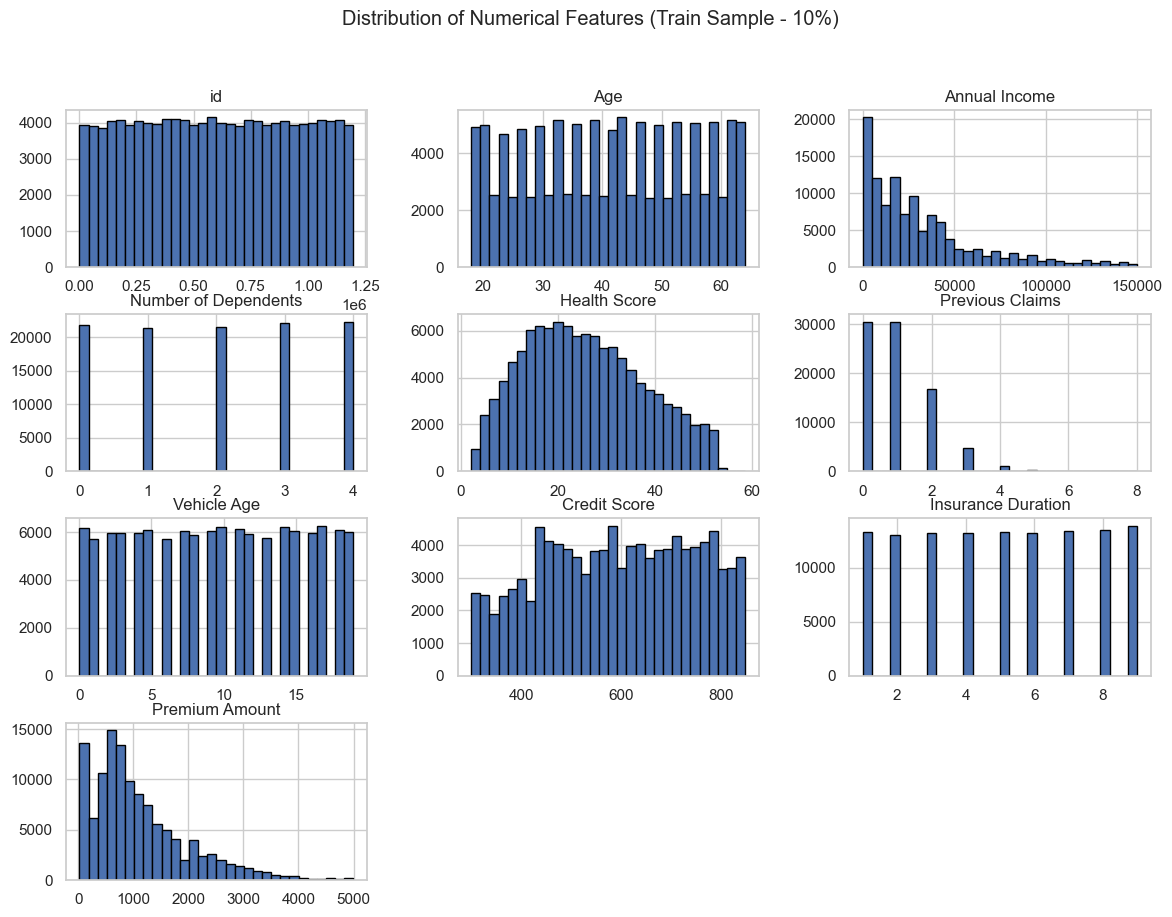

In [12]:
train_sample[num_features].hist(figsize=(14, 10), bins=30, edgecolor="black")
plt.suptitle("Distribution of Numerical Features (Train Sample - 10%)")
plt.show()

C:\Users\S.HARSHINI\AppData\Local\Temp\ipykernel_24460\2784763901.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_sample, x=col, palette="Set2")


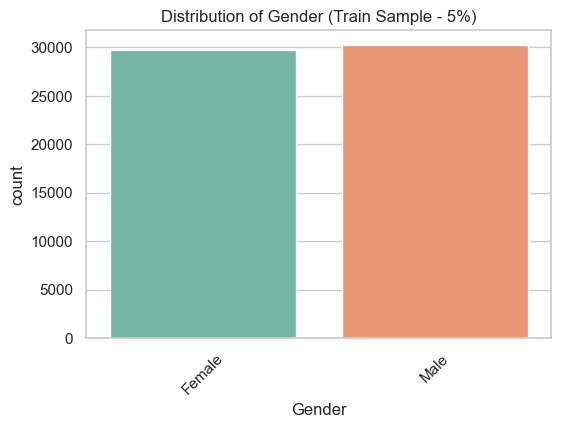

C:\Users\S.HARSHINI\AppData\Local\Temp\ipykernel_24460\2784763901.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_sample, x=col, palette="Set2")


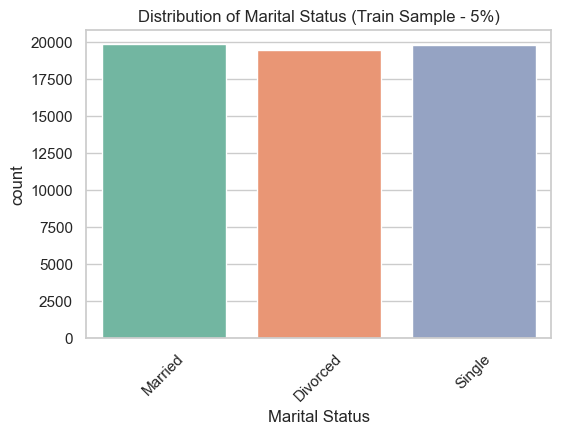

C:\Users\S.HARSHINI\AppData\Local\Temp\ipykernel_24460\2784763901.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_sample, x=col, palette="Set2")


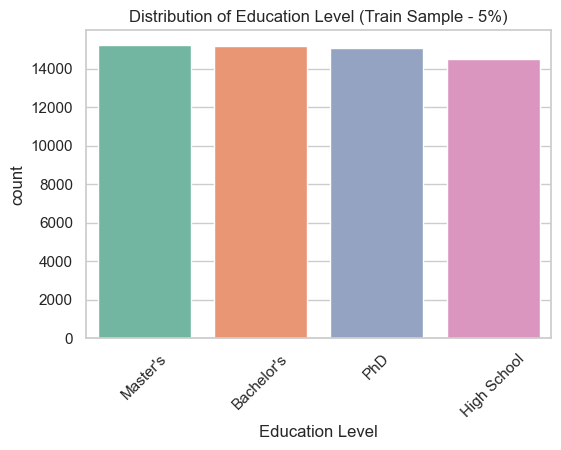

C:\Users\S.HARSHINI\AppData\Local\Temp\ipykernel_24460\2784763901.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_sample, x=col, palette="Set2")


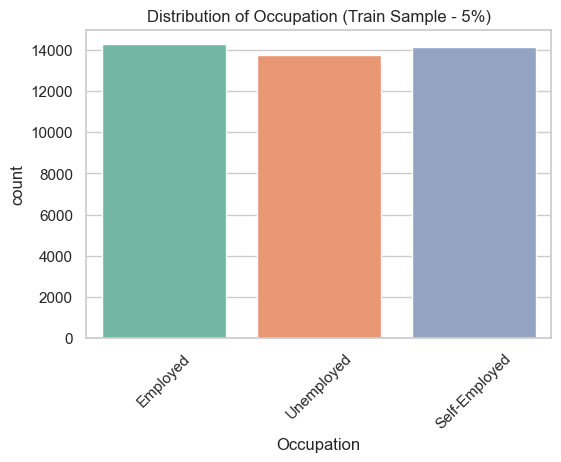

C:\Users\S.HARSHINI\AppData\Local\Temp\ipykernel_24460\2784763901.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_sample, x=col, palette="Set2")


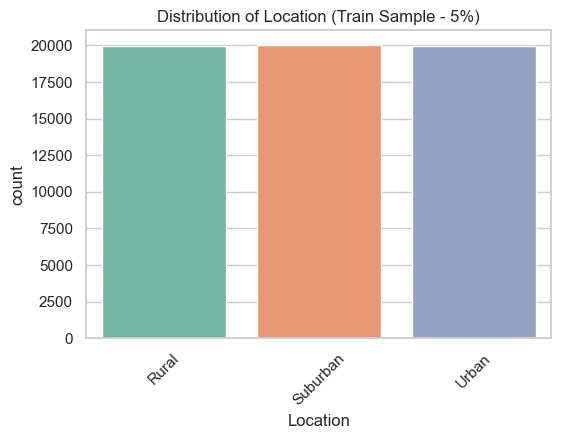

C:\Users\S.HARSHINI\AppData\Local\Temp\ipykernel_24460\2784763901.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_sample, x=col, palette="Set2")


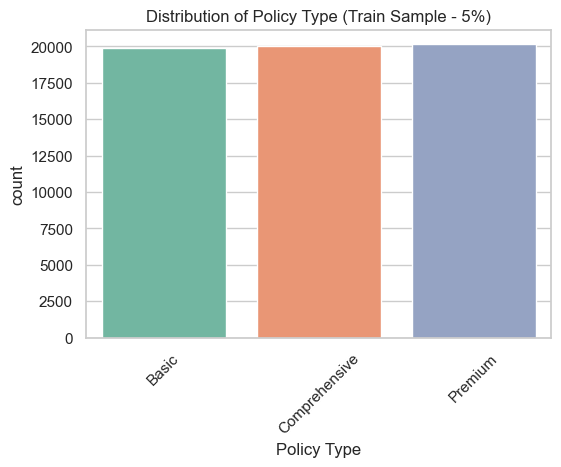

C:\Users\S.HARSHINI\AppData\Local\Temp\ipykernel_24460\2784763901.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_sample[train_sample[col].isin(top_categories)], x=col, palette="Set2")


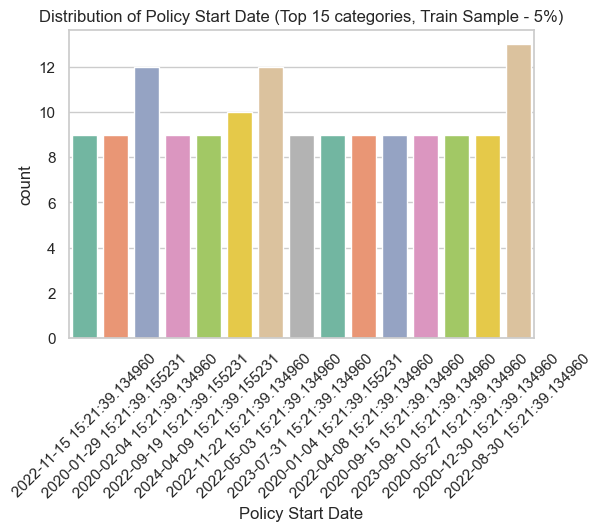

C:\Users\S.HARSHINI\AppData\Local\Temp\ipykernel_24460\2784763901.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_sample, x=col, palette="Set2")


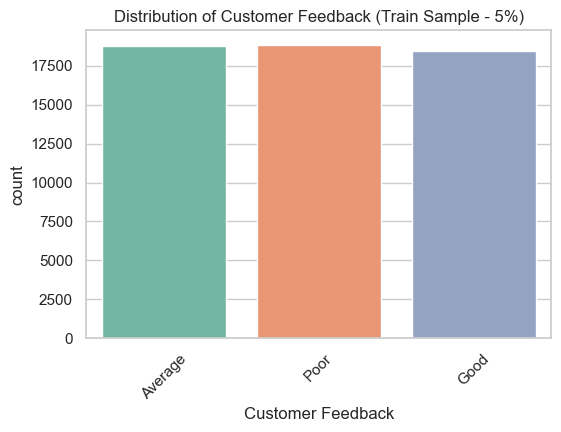

C:\Users\S.HARSHINI\AppData\Local\Temp\ipykernel_24460\2784763901.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_sample, x=col, palette="Set2")


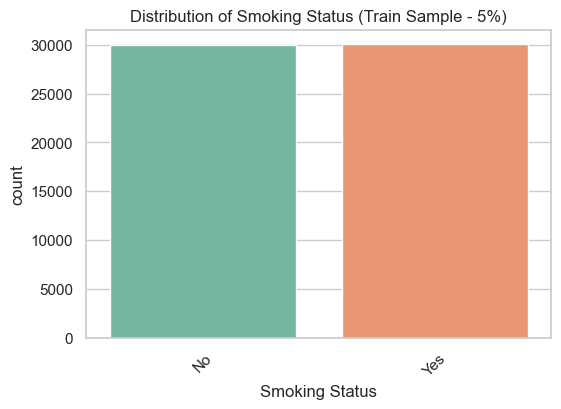

C:\Users\S.HARSHINI\AppData\Local\Temp\ipykernel_24460\2784763901.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_sample, x=col, palette="Set2")


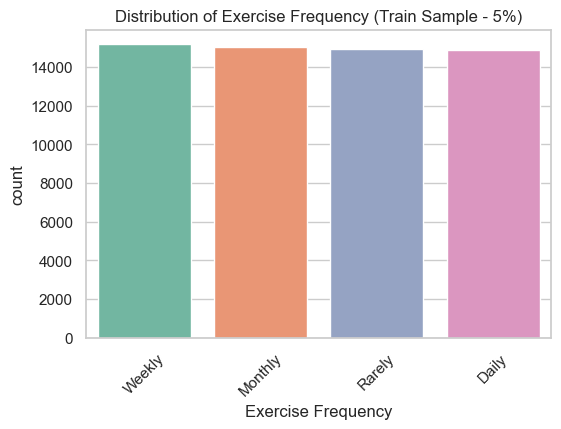

C:\Users\S.HARSHINI\AppData\Local\Temp\ipykernel_24460\2784763901.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=train_sample, x=col, palette="Set2")


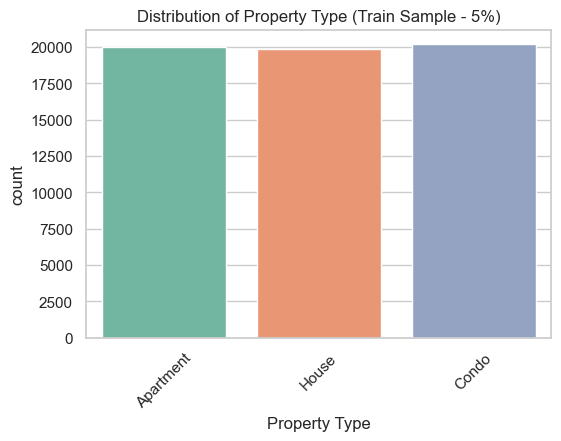

In [13]:

train_sample = train.sample(frac=0.05, random_state=42)


for col in cat_features:
    plt.figure(figsize=(6,4))
    
    
    if train_sample[col].nunique() > 15:
        top_categories = train_sample[col].value_counts().nlargest(15).index
        sns.countplot(data=train_sample[train_sample[col].isin(top_categories)], x=col, palette="Set2")
        plt.title(f"Distribution of {col} (Top 15 categories, Train Sample - 5%)")
    else:
        sns.countplot(data=train_sample, x=col, palette="Set2")
        plt.title(f"Distribution of {col} (Train Sample - 5%)")
    
    plt.xticks(rotation=45)
    plt.show()


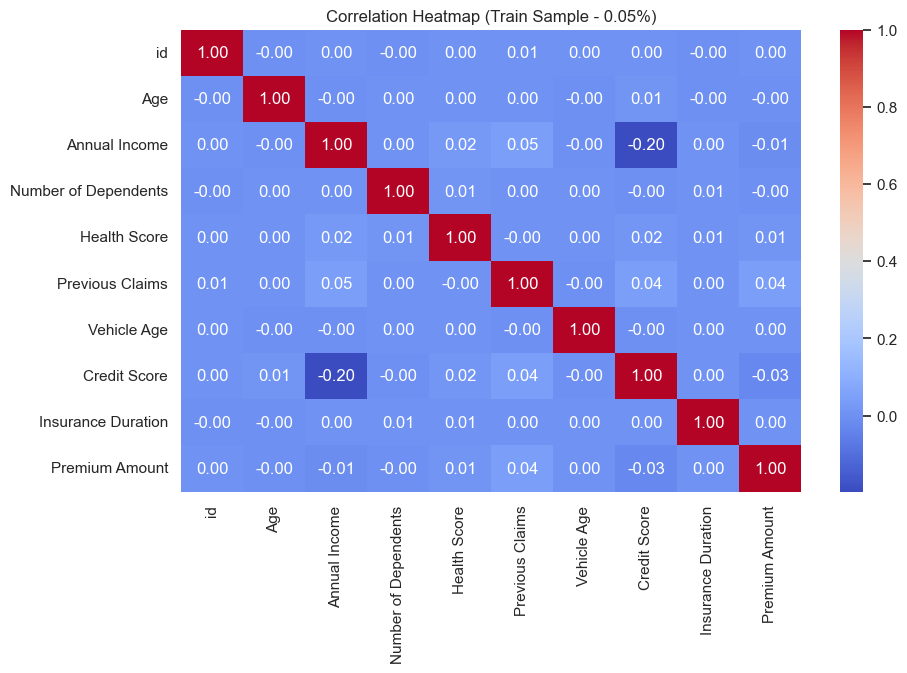

In [14]:
plt.figure(figsize=(10, 6))
sns.heatmap(train_sample[num_features].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap (Train Sample - 0.05%)")
plt.show()


In [15]:


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
import numpy as np

# Target Column
print("\nColumns in Train Dataset:", train.columns.tolist())

target = "Premium Amount"

if target not in train.columns:
    raise ValueError(f"Column '{target}' not found in train dataset! Please update 'target' variable.")

print(f"Target column selected: {target}")

# Separate numerical and categorical features
num_features = train.select_dtypes(include=[np.number]).columns.tolist()
cat_features = train.select_dtypes(include=["object", "category"]).columns.tolist()

# Remove target from features
if target in num_features:
    num_features.remove(target)
if target in cat_features:
    cat_features.remove(target)

# Drop unwanted columns (date/text etc.)
drop_features = ["Policy Start Date", "Customer Feedback"]
for col in drop_features:
    if col in cat_features:
        cat_features.remove(col)

# Final features
print("Numerical Features:", num_features)
print("Categorical Features:", cat_features)

# Preprocessing Pipelines
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),        
    ("scaler", StandardScaler())                          
])

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")), 
    ("encoder", OneHotEncoder(handle_unknown="ignore"))   
])


preprocessor = ColumnTransformer(
    transformers=[
        ("num", num_pipeline, num_features),
        ("cat", cat_pipeline, cat_features)
    ]
)

# Train Test Split
X = train.drop(columns=[target] + drop_features)  
y = train[target]

X_train, X_eval, y_train, y_eval = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train set shape:", X_train.shape)
print("Eval set shape:", X_eval.shape)



print("Data Preprocessing Setup Completed (Preprocessor Ready)")



Columns in Train Dataset: ['id', 'Age', 'Gender', 'Annual Income', 'Marital Status', 'Number of Dependents', 'Education Level', 'Occupation', 'Health Score', 'Location', 'Policy Type', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration', 'Policy Start Date', 'Customer Feedback', 'Smoking Status', 'Exercise Frequency', 'Property Type', 'Premium Amount']
Target column selected: Premium Amount
Numerical Features: ['id', 'Age', 'Annual Income', 'Number of Dependents', 'Health Score', 'Previous Claims', 'Vehicle Age', 'Credit Score', 'Insurance Duration']
Categorical Features: ['Gender', 'Marital Status', 'Education Level', 'Occupation', 'Location', 'Policy Type', 'Smoking Status', 'Exercise Frequency', 'Property Type']
Train set shape: (960000, 18)
Eval set shape: (240000, 18)
Data Preprocessing Setup Completed (Preprocessor Ready)


In [16]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np

In [25]:
results = {}
models = {
    "Linear Regression": LinearRegression(),
    "Decision Tree": DecisionTreeRegressor(
        random_state=42,
        max_depth=15,
        min_samples_split=20,
        min_samples_leaf=10
    ),
    "Random Forest": RandomForestRegressor(
        n_estimators=50,
        max_depth=8,
        random_state=42,
        n_jobs=-1
    ),
    "XGBoost": xgb.XGBRegressor(
        n_estimators=200,
        learning_rate=0.1,
        max_depth=6,
        random_state=42,
        n_jobs=-1
    )
}

for name, model in models.items():
    # Full pipeline = preprocessing + model
    pipe = Pipeline(steps=[
        ("preprocessor", preprocessor),
        ("model", model)
    ])

    
    pipe.fit(X_train, y_train)

   
    y_pred = pipe.predict(X_eval)

    
    rmse = np.sqrt(mean_squared_error(y_eval, y_pred))
    mae = mean_absolute_error(y_eval, y_pred)
    r2 = r2_score(y_eval, y_pred)

    results[name] = {"RMSE": rmse, "MAE": mae, "R2": r2}

    print(f"\n{name}:")
    print(f"  RMSE: {rmse:.4f}")
    print(f"  MAE : {mae:.4f}")
    print(f"  R²  : {r2:.4f}")


best_model_name = min(results, key=lambda k: results[k]["RMSE"])
best_model = models[best_model_name]

print("\n Best Model Selected:", best_model_name)
    


Linear Regression:
  RMSE: 863.3448
  MAE : 667.3417
  R²  : 0.0026

Decision Tree:
  RMSE: 868.2023
  MAE : 654.6696
  R²  : -0.0087

Random Forest:
  RMSE: 847.1864
  MAE : 644.1222
  R²  : 0.0396

XGBoost:
  RMSE: 847.7635
  MAE : 647.0648
  R²  : 0.0382

 Best Model Selected: Random Forest


In [27]:

import joblib
import mlflow
import mlflow.sklearn
from sklearn.pipeline import Pipeline


full_pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("model", best_model)
])


full_pipeline.fit(X_train, y_train)


joblib.dump(full_pipeline, "ml_pipeline.pkl")
print("\n Full ML pipeline saved as ml_pipeline.pkl")


mlflow.set_experiment("SmartPremium_Insurance")

with mlflow.start_run(run_name=best_model_name):
    
    mlflow.log_param("model", best_model_name)

    
    mlflow.log_metric("RMSE", results[best_model_name]["RMSE"])
    mlflow.log_metric("MAE", results[best_model_name]["MAE"])
    mlflow.log_metric("R2", results[best_model_name]["R2"])

    
    mlflow.sklearn.log_model(full_pipeline, "model")

print("\n MLflow experiment logged successfully")


Traceback (most recent call last):
  File "C:\Users\S.HARSHINI\anaconda3\Lib\site-packages\mlflow\store\tracking\file_store.py", line 366, in search_experiments
    exp = self._get_experiment(exp_id, view_type)
  File "C:\Users\S.HARSHINI\anaconda3\Lib\site-packages\mlflow\store\tracking\file_store.py", line 464, in _get_experiment
    meta = FileStore._read_yaml(experiment_dir, FileStore.META_DATA_FILE_NAME)
  File "C:\Users\S.HARSHINI\anaconda3\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1634, in _read_yaml
    return _read_helper(root, file_name, attempts_remaining=retries)
  File "C:\Users\S.HARSHINI\anaconda3\Lib\site-packages\mlflow\store\tracking\file_store.py", line 1627, in _read_helper
    result = read_yaml(root, file_name)
  File "C:\Users\S.HARSHINI\anaconda3\Lib\site-packages\mlflow\utils\yaml_utils.py", line 107, in read_yaml
    raise MissingConfigException(f"Yaml file '{file_path}' does not exist.")
mlflow.exceptions.MissingConfigException: Yaml file '


 Full ML pipeline saved as ml_pipeline.pkl


2025/09/09 01:15:10 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/09/09 01:15:14 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.



 MLflow experiment logged successfully
